In [ ]:
# predict the next one of OHLC, use shift
# TODO check also parameter shift(-1, freq='H')  -> to ensure shifting is correct, even with missing time periods?
lag = -1
y_raw = df2.loc[:,"XAUUSD"].shift(periods=lag)

In [ ]:
# to fill nan values, use fillna
y_raw = y_raw.fillna(method='pad')
y_raw

In [ ]:
# if you have a numpy array, use DataFrame for pretty print:
y_Test = pd.DataFrame(data=y_test)
y_Test.columns=["XAUUSDopen"]
y_Test

In [ ]:
# data normalization:

# Scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

y_train_std = sc.fit_transform(y_train.reshape(-1, 1)) #Reshape to get the right tensor dimension 
y_test_std = sc.transform(y_test.reshape(-1, 1)) #Reshape to get the right tensor dimension

In [1]:
# use price returns to make time series more stationary:

# "In prediction problems it is common practice to remove trend and make the series more stationary 
# by using price returns instead of the actual price."

# -> For example, with the “scipy.signal.detrend” method, or by differentiating the series.
# The Pandas library provides a method to automatically calculate the difference of our dataset. 
# This diff() method is provided on both the Series and DataFrame objects.

In [2]:
import pandas as pd

SP500 = pd.read_csv('data/SP500_short.csv', index_col='Date')
SP500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 04/01/2016 to 11/09/2017
Data columns (total 8 columns):
JPM UN Equity      426 non-null float64
USB UN Equity      426 non-null float64
GS UN Equity       426 non-null float64
FB UW Equity       426 non-null float64
AAPL UW Equity     426 non-null float64
GOOGL UW Equity    426 non-null float64
GM UN Equity       426 non-null float64
F UN Equity        426 non-null float64
dtypes: float64(8)
memory usage: 30.0+ KB


In [3]:
SP500.head()

,JPM UN Equity,USB UN Equity,GS UN Equity,FB UW Equity,AAPL UW Equity,GOOGL UW Equity,GM UN Equity,F UN Equity
Date,,,,,,,,
04/01/2016,63.62,41.48,177.14,102.22,105.35,759.44,33.31,13.97
05/01/2016,63.73,41.68,174.09,102.73,102.71,761.53,32.43,13.72
06/01/2016,62.81,41.05,169.84,102.97,100.70,759.33,31.27,13.11
07/01/2016,60.27,40.27,164.62,97.92,96.45,741.00,29.99,12.70
08/01/2016,58.92,39.70,163.94,97.33,96.96,730.91,29.53,12.54


In [4]:
aapl = SP500['AAPL UW Equity']
pd.DataFrame({'AAPL': aapl, '% change':aapl.pct_change(), 'diff()': aapl.diff()})

,AAPL,% change,diff()
Date,,,
04/01/2016,105.35,NaN,NaN
05/01/2016,102.71,-0.025059,-2.64
06/01/2016,100.70,-0.019570,-2.01
07/01/2016,96.45,-0.042205,-4.25
08/01/2016,96.96,0.005288,0.51
...,...,...,...
05/09/2017,162.08,-0.012009,-1.97
06/09/2017,161.91,-0.001049,-0.17
07/09/2017,161.26,-0.004015,-0.65


In [5]:
df_aapl = pd.DataFrame({'AAPL':aapl})

In [10]:
df_aapl.describe()

,AAPL
count,426.000000
mean,120.740481
std,21.698799
min,90.340000
25%,101.967500
50%,113.420000
75%,142.657500
max,164.050000


In [11]:
from matplotlib import pyplot

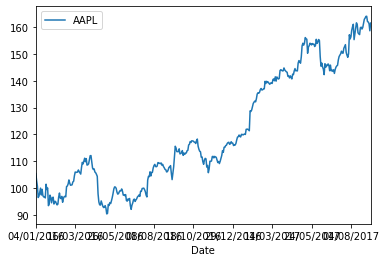

In [12]:
df_aapl.plot()

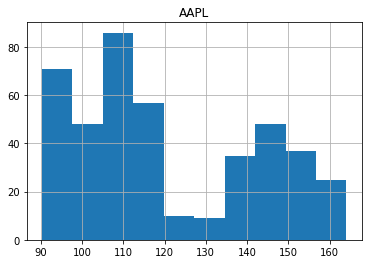

In [7]:
df_aapl.hist()
pyplot.show()

In [18]:
df_aapl.values.ravel().shape

(426,)

In [19]:
# calculate stationarity test of time series data
from statsmodels.tsa.stattools import adfuller
X = df_aapl.values.ravel()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.289211
p-value: 0.976844
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570


the p-value of 0.97 suggests we cannot reject the null hypothesis that there is a unit root i.e. the time series is non-stationary.
see
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

In [20]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [27]:
X = df_aapl.values.ravel()
X.shape

(426,)

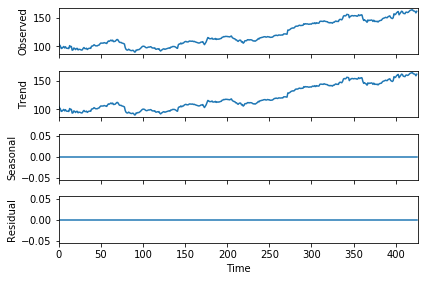

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
X = df_aapl.values.ravel()
result = seasonal_decompose(X, model='additive', freq=1)  #model='multiplicative'
# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)
result.plot()
pyplot.show()

see
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

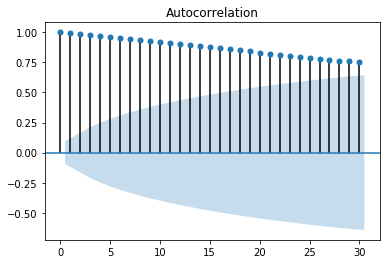

In [37]:
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(df_aapl, lags=30)
pyplot.show()

In [ ]:
# TODO check plot KDE ..

# line plot of residuals
residuals = DataFrame(model_fit.resid)
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

#### Time to Maturity

consider this:
- use time-to-maturity (TTM) when working with financial data
- TTM can help the model handling non-stationarity in data
- e.g. TTM -> time to the end of the (trading) day or some terminal day